# Numerically solving and plotting a system of Ordinary Differential Equations

We are approximating the solution to $y'(t) = f(t,y)$ subject to $y(0)=y_0$ from $t=0$ to $t=T$. $y$ is an $n$-vector.

$x$[state,time index] is a matrix where state = 0 is always time, and the other n states correspond to the $n$ components in the unknown $n$-vector $y$.

Since we want to plot each component of $y$ over time, we will need to record $y$ at each time step.

In [53]:
# %pylab inline  #if you uncomment this, you do not need to specify "np." or "np.linalg." in the code.
import time
import numpy as np
import matplotlib.pyplot as plt

In [54]:
initial_y_value = [10.0, 0.1, 0.0]  #Value of each y_i at t = 0
h = 0.01  # h is the time step, delta t
T = 14.0  # T is the time where we want to approximate the unknown function y.  
         # T needs to be an integer multiple of h.
N = int(T/h)

n = len(initial_y_value)

x = np.zeros((n+1,N+1))# n+1 because the 0th entry is time. N+1 because we have both t=0 and t=T


In [55]:
def f(x,i):  #This returns the output of the function f for which x'=f(x) 
    func = np.zeros(n+1)
    func[0] = 1.0
    
    #SIR model
    beta = 0.6 # proportion of susceptible that become infected
    gamma = 1.9 # proportion of infected that recover
    mu = 0.2  # proportion of recovered that become susceptible
    
    func[1] = (-beta)*(x[1,i])*(x[2,i])+(mu)*(x[3,i])
    func[2] = (beta)*(x[1,i])*(x[2,i])-(gamma)*(x[2,i])
    func[3] = (gamma)*(x[2,i])-(mu)*(x[3,i])
    return func

In [56]:
#MAIN
start = time.process_time()

x[0,0] = 0  #initial t value
x[1:,0] = initial_y_value
for i in range (N):
    function = f(x,i)
    x[0,i+1] = x[0,i] + h
    x[1,i+1] = x[1,i] + h*(function[1])
    x[2,i+1] = x[2,i] + h*(function[2])
    x[3,i+1] = x[3,i] + h*(function[3])
    
print("This took", time.process_time() - start, "seconds.")


This took 0.011291999999999192 seconds.


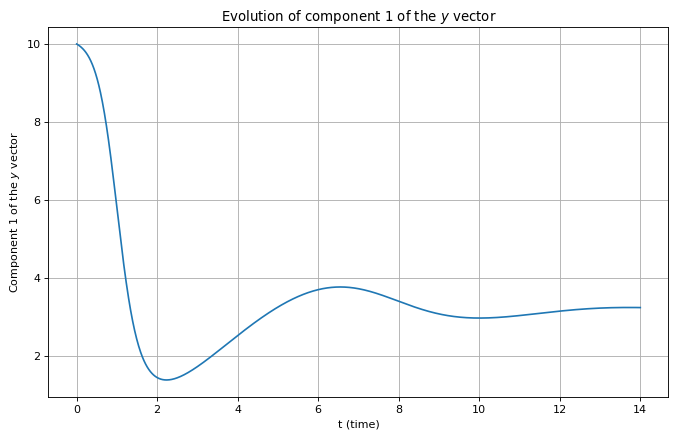

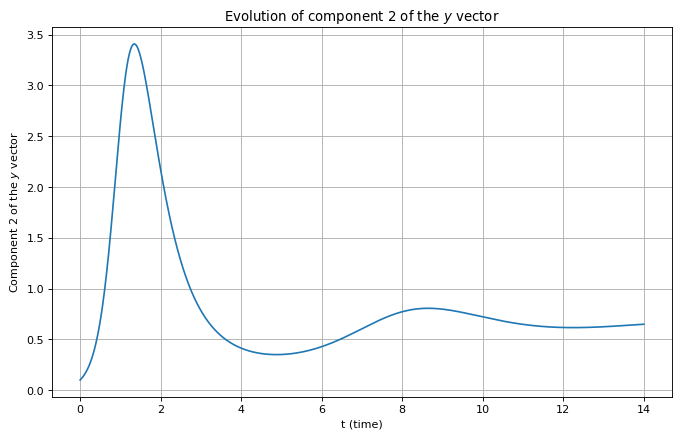

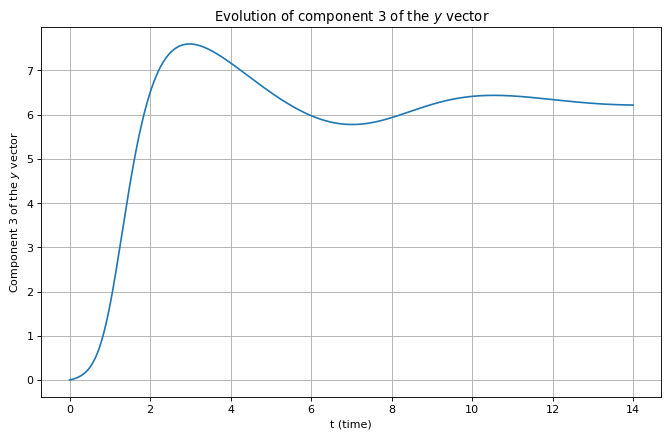

In [57]:
t_plot = x[0,:]

for i in range(1,n+1):
    plt.figure(figsize=(10, 6), dpi=80)
    plt.plot(t_plot,x[i,:])
    plt.title("Evolution of component " + str(i) + " of the $y$ vector")
    plt.xlabel('t (time)'); plt.ylabel("Component " + str(i) + " of the $y$ vector")
    plt.grid()


In [ ]:
# These results for T = 14 months make sense.
# For starters, looking at the graph for S, a large number of people start susceptible to becoming infected,
# then as infections rise, S decreases before going on the rise again due to R, which happens because as some
# people recover, they become susceptible again. This makes the whole process repeat on a smaller scale, because
# not everyone becomes susceptible to the disease again after recovery.

# The same logic applies for the graph of I. Infections rise very quickly when the number of those susceptible is
# very high and then decreases very quickly as those susceptible deecreases and those who recover and are immune
# rises. As those who do not sustain immunity become susceptible again, the infection spike repeats but on a much
# smaller scale, which we see in the graph.

# The same reasoning holds for the graph of R as well. We see a spike of recoveries in the beginning before a slow
# decrease, and then another smaller scale spike after the susceptibility rate and the infection rate increase on
# their smaller scale spikes.

# If T gets even larger, the spikes on each graph will repeat but with they will become smaller relative to the
# spikes before it.

# If gamma = 2.5 and mu = .5, then I converges to .7. This means R must converge to 3.5. The rate of recoveries over
# time will converge to 0 as some number of people become immune. So, if we look at the equation 
# dR/dt = (gamma)I - (mu)R, then we just solve the resulting equation for R with dR/dt = 0.